<a href="https://colab.research.google.com/github/advaidh11/210701017-CS19P18-DLC-Lab-main/blob/main/EX10_CNN_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#CNN MODEL  FOR IMAGE CLASSIFICATION

In [3]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Step 1: Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


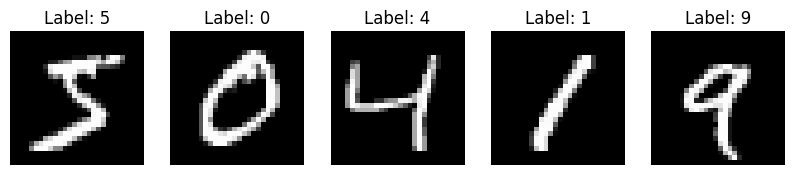

In [5]:
# Visualization: Display sample images with labels
def visualize_samples(images, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f"Label: {np.argmax(labels[i])}")
    plt.show()

visualize_samples(x_train, y_train)

In [6]:
# Step 2: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9087 - loss: 0.2847 - val_accuracy: 0.9851 - val_loss: 0.0466
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9888 - val_loss: 0.0354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9901 - val_loss: 0.0293
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9884 - val_loss: 0.0368
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9905 - val_loss: 0.0330


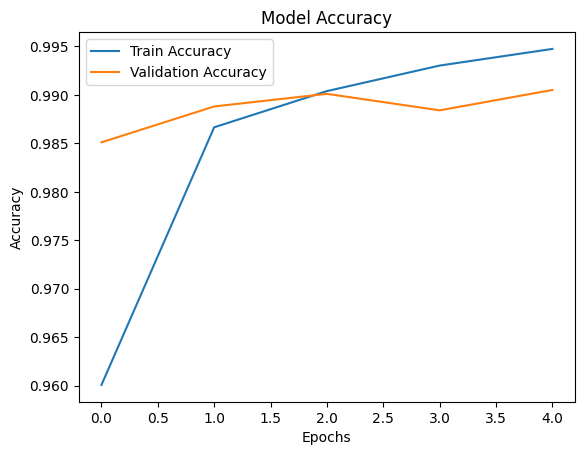

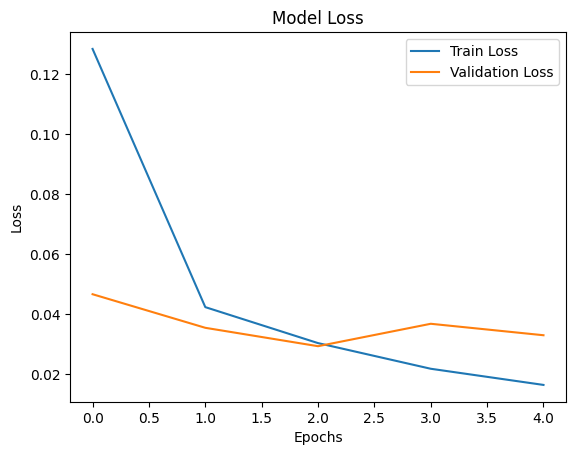

In [8]:
# Visualization: Plot training accuracy and loss
def plot_training_progress(history):
    # Accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_progress(history)

In [9]:
# Step 4: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9881 - loss: 0.0415
Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


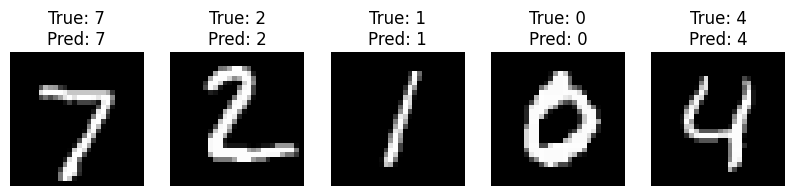

In [10]:
# Step 5: Visualize predictions
def visualize_predictions(model, images, labels, num_samples=5):
    sample_images = images[:num_samples]
    predictions = model.predict(sample_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels[:num_samples], axis=1)

    # Plot predictions
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.show()

visualize_predictions(model, x_test, y_test)